# Public health research with python

**FAO data, files exploration and data cleaning**

In [1]:
import pandas as pd

In [2]:
import numpy as np

*a. [undernutrition.csv](http://localhost:8888/edit/undernutrition.csv) : exploration and data cleaning*

- Loading file:

In [3]:
undernutrition = pd.read_csv('undernutrition.csv', sep=';')

- First 5 rows display :

In [4]:
undernutrition.head()

,Zone,Année,Valeur (en million d'hab)
0,Afghanistan,2012-2014,8.6
1,Afghanistan,2013-2015,8.8
2,Afghanistan,2014-2016,8.9
3,Afghanistan,2015-2017,9.7
4,Afghanistan,2016-2018,10.5


- Number of rows and columns :

In [5]:
undernutrition.shape

(1218, 3)

- .dtypes display :

In [6]:
undernutrition.dtypes

Zone                         object
Année                        object
Valeur (en million d'hab)    object
dtype: object

- "Valeur" column .unique values display :

In [7]:
undernutrition["Valeur (en million d'hab)"].unique()

array(['8.6', '8.8', '8.9', '9.7', '10.5', '11.1', '2.2', '2.5', '2.8',
       '3', '3.1', '3.3', '0.1', '1.3', '1.2', nan, '7.6', '6.2', '5.3',
       '5.6', '5.8', '5.7', '1.5', '1.6', '1.1', '1.7', '<0.1', '21.7',
       '22.4', '23.3', '22.3', '21.5', '20.9', '0.8', '2', '1.9', '1.8',
       '0.4', '0.5', '0.3', '0.2', '3.2', '3.4', '3.6', '3.8', '2.1',
       '2.3', '2.4', '0.6', '0.7', '0.9', '3.9', '2.7', '1.4', '4.8',
       '4.6', '4.9', '5', '4.4', '4.3', '4.2', '4.5', '26.2', '24.3',
       '21.3', '21.1', '2.9', '5.1', '5.2', '5.4', '203.8', '198.3',
       '193.1', '190.9', '190.1', '189.2', '23.6', '24', '24.1', '3.7',
       '7.3', '7.8', '8.4', '9', '9.1', '10.1', '10', '10.7', '11.5',
       '11.9', '11.8', '8.7', '10.3', '11', '1', '5.5', '6.8', '7.9',
       '5.9', '7', '9.2', '9.4', '9.6', '6.7', '7.1', '7.2', '14.7',
       '17.4', '20.2', '22.2', '22.8', '24.6', '31.1', '28.5', '25.4',
       '24.8', '26.1', '14.5', '15.4', '16.5', '15.8', '15.7', '10.8',
       '

- Update "Valeur" column to numeric :

In [8]:
undernutrition["Valeur (en million d'hab)"] = pd.to_numeric(undernutrition["Valeur (en million d'hab)"],errors = 'coerce')

- .dtypes display :

In [9]:
undernutrition.dtypes

Zone                          object
Année                         object
Valeur (en million d'hab)    float64
dtype: object

- "Valeur" column display :

In [10]:
undernutrition["Valeur (en million d'hab)"]

0        8.6
1        8.8
2        8.9
3        9.7
4       10.5
        ... 
1213     NaN
1214     NaN
1215     NaN
1216     NaN
1217     NaN
Name: Valeur (en million d'hab), Length: 1218, dtype: float64

- Replace NaN values by 0.00 :

In [11]:
undernutrition["Valeur (en million d'hab)"].fillna(0, inplace=True)

In [12]:
undernutrition["Valeur (en million d'hab)"]

0        8.6
1        8.8
2        8.9
3        9.7
4       10.5
        ... 
1213     0.0
1214     0.0
1215     0.0
1216     0.0
1217     0.0
Name: Valeur (en million d'hab), Length: 1218, dtype: float64

- Update "Année" column values :

In [13]:
undernutrition = undernutrition.replace(["2012-2014","2013-2015","2014-2016","2015-2017","2016-2018","2017-2019"],
                                        ["2013","2014","2015","2016","2017","2018"])

In [14]:
print(undernutrition)

             Zone Année  Valeur (en million d'hab)
0     Afghanistan  2013                        8.6
1     Afghanistan  2014                        8.8
2     Afghanistan  2015                        8.9
3     Afghanistan  2016                        9.7
4     Afghanistan  2017                       10.5
...           ...   ...                        ...
1213     Zimbabwe  2014                        0.0
1214     Zimbabwe  2015                        0.0
1215     Zimbabwe  2016                        0.0
1216     Zimbabwe  2017                        0.0
1217     Zimbabwe  2018                        0.0

[1218 rows x 3 columns]


- Convert "Valeur" column values in thousands of inhabitants :

In [15]:
undernutrition["Valeur (en milliers d'hab)"] = undernutrition["Valeur (en million d'hab)"] * 1000

In [16]:
undernutrition.head()

,Zone,Année,Valeur (en million d'hab),Valeur (en milliers d'hab)
0,Afghanistan,2013,8.6,8600.0
1,Afghanistan,2014,8.8,8800.0
2,Afghanistan,2015,8.9,8900.0
3,Afghanistan,2016,9.7,9700.0
4,Afghanistan,2017,10.5,10500.0


- Convert "Valeur (en milliers d'hab)" column to integer :

In [17]:
undernutrition = undernutrition.astype({"Valeur (en milliers d'hab)": int})

In [18]:
undernutrition.head()

,Zone,Année,Valeur (en million d'hab),Valeur (en milliers d'hab)
0,Afghanistan,2013,8.6,8600
1,Afghanistan,2014,8.8,8800
2,Afghanistan,2015,8.9,8900
3,Afghanistan,2016,9.7,9700
4,Afghanistan,2017,10.5,10500


- New df on 2017:

In [19]:
undernutrition2017 = undernutrition.loc[undernutrition["Année"].isin(["2017"])].copy()

In [20]:
undernutrition2017.head()

,Zone,Année,Valeur (en million d'hab),Valeur (en milliers d'hab)
4,Afghanistan,2017,10.5,10500
10,Afrique du Sud,2017,3.1,3100
16,Albanie,2017,0.1,100
22,Algérie,2017,1.3,1300
28,Allemagne,2017,0.0,0


*b. [population.csv](http://localhost:8888/edit/population.csv) : exploration and data cleaning*

- Loading file:

In [21]:
population = pd.read_csv('population.csv', sep=';')

- First 5 rows display :

In [22]:
population.head()

,Zone,Année,Valeur (en milliers d'hab)
0,Afghanistan,2013,32269.589
1,Afghanistan,2014,33370.794
2,Afghanistan,2015,34413.603
3,Afghanistan,2016,35383.032
4,Afghanistan,2017,36296.113


- Number of rows and columns :

In [23]:
population.shape

(1416, 3)

- .dtypes display :

In [24]:
population.dtypes

Zone                           object
Année                           int64
Valeur (en milliers d'hab)    float64
dtype: object

- Convert "Valeur" column values to million of inhabitants :

In [25]:
population["Valeur (en million d'hab)"] = population["Valeur (en milliers d'hab)"] / 1000

In [26]:
population["Population totale"] = population["Valeur (en milliers d'hab)"] * 1000

In [27]:
population.head()

,Zone,Année,Valeur (en milliers d'hab),Valeur (en million d'hab),Population totale
0,Afghanistan,2013,32269.589,32.269589,32269589.0
1,Afghanistan,2014,33370.794,33.370794,33370794.0
2,Afghanistan,2015,34413.603,34.413603,34413603.0
3,Afghanistan,2016,35383.032,35.383032,35383032.0
4,Afghanistan,2017,36296.113,36.296113,36296113.0


- population 2017 new df :

In [28]:
pop2017 = population.loc[population["Année"].isin([2017])].copy()

In [29]:
pop2017.head()

,Zone,Année,Valeur (en milliers d'hab),Valeur (en million d'hab),Population totale
4,Afghanistan,2017,36296.113,36.296113,36296113.0
10,Afrique du Sud,2017,57009.756,57.009756,57009756.0
16,Albanie,2017,2884.169,2.884169,2884169.0
22,Algérie,2017,41389.189,41.389189,41389189.0
28,Allemagne,2017,82658.409,82.658409,82658409.0


In [30]:
pop2017.rename(columns = {"Valeur (en milliers d'hab)": "Population (en milliers d'hab)",
                          "Valeur (en million d'hab)": "Population (en million d'hab)",
                         "Année": "2017"}, inplace=True)

In [31]:
pop2017.head()

,Zone,2017,Population (en milliers d'hab),Population (en million d'hab),Population totale
4,Afghanistan,2017,36296.113,36.296113,36296113.0
10,Afrique du Sud,2017,57009.756,57.009756,57009756.0
16,Albanie,2017,2884.169,2.884169,2884169.0
22,Algérie,2017,41389.189,41.389189,41389189.0
28,Allemagne,2017,82658.409,82.658409,82658409.0


In [32]:
pop2017.shape

(236, 5)

*c. [food_help.csv](http://localhost:8888/edit/food_help.csv) : exploration and data cleaning*


- Loading file:

In [33]:
foodHelp = pd.read_csv('food_help.csv', sep=';')

- First 5 rows display :

In [34]:
foodHelp.head()

,Pays bénéficiaire,Année,Produit,Valeur
0,Afghanistan,2013,Autres non-céréales,682
1,Afghanistan,2014,Autres non-céréales,335
2,Afghanistan,2013,Blé et Farin,39224
3,Afghanistan,2014,Blé et Farin,15160
4,Afghanistan,2013,Céréales,40504


- Number of rows and columns :

In [35]:
foodHelp.shape

(1475, 4)

- .dtypes display :

In [36]:
foodHelp.dtypes

Pays bénéficiaire    object
Année                 int64
Produit              object
Valeur                int64
dtype: object

- Rename "Valeur" column by "Valeur (en tonnes)" :

In [37]:
foodHelp.rename(columns = {'Valeur': 'Valeur (en tonnes)'}, inplace=True)

In [38]:
print(foodHelp)

     Pays bénéficiaire  Année                   Produit  Valeur (en tonnes)
0          Afghanistan   2013       Autres non-céréales                 682
1          Afghanistan   2014       Autres non-céréales                 335
2          Afghanistan   2013              Blé et Farin               39224
3          Afghanistan   2014              Blé et Farin               15160
4          Afghanistan   2013                  Céréales               40504
...                ...    ...                       ...                 ...
1470          Zimbabwe   2015  Mélanges et préparations                  96
1471          Zimbabwe   2013              Non-céréales                5022
1472          Zimbabwe   2014              Non-céréales                2310
1473          Zimbabwe   2015              Non-céréales                 306
1474          Zimbabwe   2013                Riz, total                  64

[1475 rows x 4 columns]


*d. [food_availability.csv](http://localhost:8888/edit/food_availability.csv) : exploration and data cleaning*

- Loading file:

In [39]:
foodAvailability = pd.read_csv('food_availability.csv', sep=';')

- First 5 rows display :

In [40]:
foodAvailability.head()

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,Abats Comestible,animale,NaN,NaN,5.0,1.72,0.20,0.77,53.0,NaN,NaN,53.0,NaN,53.0,NaN,NaN,NaN
1,Afghanistan,"Agrumes, Autres",vegetale,NaN,NaN,1.0,1.29,0.01,0.02,41.0,2.0,40.0,39.0,2.0,3.0,NaN,NaN,NaN
2,Afghanistan,Aliments pour enfants,vegetale,NaN,NaN,1.0,0.06,0.01,0.03,2.0,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,Ananas,vegetale,NaN,NaN,0.0,0.00,NaN,NaN,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,Bananes,vegetale,NaN,NaN,4.0,2.70,0.02,0.05,82.0,NaN,82.0,82.0,NaN,NaN,NaN,NaN,NaN


- Number of rows and columns :

In [41]:
foodAvailability.shape

(15605, 18)

- Replace NaN values by 0.00 :

In [42]:
foodAvailability.fillna(0, inplace=True)

- foodAvailability dataframe display :

In [43]:
print(foodAvailability)

               Zone                Produit   Origine  Aliments pour animaux  \
0       Afghanistan       Abats Comestible   animale                    0.0   
1       Afghanistan        Agrumes, Autres  vegetale                    0.0   
2       Afghanistan  Aliments pour enfants  vegetale                    0.0   
3       Afghanistan                 Ananas  vegetale                    0.0   
4       Afghanistan                Bananes  vegetale                    0.0   
...             ...                    ...       ...                    ...   
15600  Îles Salomon       Viande de Suides   animale                    0.0   
15601  Îles Salomon    Viande de Volailles   animale                    0.0   
15602  Îles Salomon          Viande, Autre   animale                    0.0   
15603  Îles Salomon                    Vin  vegetale                    0.0   
15604  Îles Salomon         Épices, Autres  vegetale                    0.0   

       Autres Utilisations  Disponibilité alimentai

- .dtypes display :

In [44]:
foodAvailability.dtypes

Zone                                                              object
Produit                                                           object
Origine                                                           object
Aliments pour animaux                                            float64
Autres Utilisations                                              float64
Disponibilité alimentaire (Kcal/personne/jour)                   float64
Disponibilité alimentaire en quantité (kg/personne/an)           float64
Disponibilité de matière grasse en quantité (g/personne/jour)    float64
Disponibilité de protéines en quantité (g/personne/jour)         float64
Disponibilité intérieure                                         float64
Exportations - Quantité                                          float64
Importations - Quantité                                          float64
Nourriture                                                       float64
Pertes                                             

- Convert use of food availability columns in "kilogram" :

In [45]:
Convert1 = ["Aliments pour animaux",
            "Autres Utilisations",
            "Disponibilité intérieure",
            "Exportations - Quantité",
            "Importations - Quantité",
            "Nourriture",
            "Pertes",
            "Production",
            "Semences",
            "Traitement",
            "Variation de stock"]

for columns in Convert1 :
    foodAvailability[columns]*= 1000000

In [46]:
print(foodAvailability)

               Zone                Produit   Origine  Aliments pour animaux  \
0       Afghanistan       Abats Comestible   animale                    0.0   
1       Afghanistan        Agrumes, Autres  vegetale                    0.0   
2       Afghanistan  Aliments pour enfants  vegetale                    0.0   
3       Afghanistan                 Ananas  vegetale                    0.0   
4       Afghanistan                Bananes  vegetale                    0.0   
...             ...                    ...       ...                    ...   
15600  Îles Salomon       Viande de Suides   animale                    0.0   
15601  Îles Salomon    Viande de Volailles   animale                    0.0   
15602  Îles Salomon          Viande, Autre   animale                    0.0   
15603  Îles Salomon                    Vin  vegetale                    0.0   
15604  Îles Salomon         Épices, Autres  vegetale                    0.0   

       Autres Utilisations  Disponibilité alimentai

- Rename use of food availability columns by adding "(en kg)" :

In [47]:
foodAvailability.rename(columns = {'Nourriture': 'Nourriture (en kg)','Pertes': 'Pertes (en kg)','Aliments pour animaux': 'Aliments pour animaux (en kg)','Autres Utilisations': 'Autres Utilisations (en kg)','Disponibilité intérieure': 'Disponibilité intérieure (en kg)','Exportations - Quantité': 'Exportations - Quantité (en kg)','Importations - Quantité': 'Importations - Quantité (en kg)','Nourriture (en kg)': 'Nourriture (en kg)','Pertes': 'Pertes (en kg)','Production': 'Production (en kg)','Semences': 'Semences (en kg)','Traitement': 'Traitement (en kg)','Variation de stock': 'Variation de stock (en kg)'}) 

,Zone,Produit,Origine,Aliments pour animaux (en kg),Autres Utilisations (en kg),Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure (en kg),Exportations - Quantité (en kg),Importations - Quantité (en kg),Nourriture (en kg),Pertes (en kg),Production (en kg),Semences (en kg),Traitement (en kg),Variation de stock (en kg)
0,Afghanistan,Abats Comestible,animale,0.0,0.0,5.0,1.72,0.20,0.77,53000000.0,0.0,0.0,53000000.0,0.0,53000000.0,0.0,0.0,0.0
1,Afghanistan,"Agrumes, Autres",vegetale,0.0,0.0,1.0,1.29,0.01,0.02,41000000.0,2000000.0,40000000.0,39000000.0,2000000.0,3000000.0,0.0,0.0,0.0
2,Afghanistan,Aliments pour enfants,vegetale,0.0,0.0,1.0,0.06,0.01,0.03,2000000.0,0.0,2000000.0,2000000.0,0.0,0.0,0.0,0.0,0.0
3,Afghanistan,Ananas,vegetale,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Afghanistan,Bananes,vegetale,0.0,0.0,4.0,2.70,0.02,0.05,82000000.0,0.0,82000000.0,82000000.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15600,Îles Salomon,Viande de Suides,animale,0.0,0.0,45.0,4.70,4.28,1.41,3000000.0,0.0,0.0,3000000.0,0.0,2000000.0,0.0,0.0,0.0
15601,Îles Salomon,Viande de Volailles,animale,0.0,0.0,11.0,3.34,0.69,1.14,2000000.0,0.0,2000000.0,2000000.0,0.0,0.0,0.0,0.0,0.0
15602,Îles Salomon,"Viande, Autre",animale,0.0,0.0,0.0,0.06,0.00,0.04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15603,Îles Salomon,Vin,vegetale,0.0,0.0,0.0,0.07,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**The State of Food Security and Nutrition in the World 2017**

*1. Proportion of people undernourished in 2017 :*

- DataFrames display :

In [48]:
undernutrition2017

,Zone,Année,Valeur (en million d'hab),Valeur (en milliers d'hab)
4,Afghanistan,2017,10.5,10500
10,Afrique du Sud,2017,3.1,3100
16,Albanie,2017,0.1,100
22,Algérie,2017,1.3,1300
28,Allemagne,2017,0.0,0
...,...,...,...,...
1192,Venezuela (République bolivarienne du),2017,8.0,8000
1198,Viet Nam,2017,6.5,6500
1204,Yémen,2017,0.0,0
1210,Zambie,2017,0.0,0


- Merge DataFrames :

In [49]:
proportionUndernutrition = pop2017.merge(undernutrition2017, on="Zone", how="left")

In [50]:
proportionUndernutrition

,Zone,2017,Population (en milliers d'hab),Population (en million d'hab),Population totale,Année,Valeur (en million d'hab),Valeur (en milliers d'hab)
0,Afghanistan,2017,36296.113,36.296113,36296113.0,2017,10.5,10500.0
1,Afrique du Sud,2017,57009.756,57.009756,57009756.0,2017,3.1,3100.0
2,Albanie,2017,2884.169,2.884169,2884169.0,2017,0.1,100.0
3,Algérie,2017,41389.189,41.389189,41389189.0,2017,1.3,1300.0
4,Allemagne,2017,82658.409,82.658409,82658409.0,2017,0.0,0.0
...,...,...,...,...,...,...,...,...
231,Venezuela (République bolivarienne du),2017,29402.484,29.402484,29402484.0,2017,8.0,8000.0
232,Viet Nam,2017,94600.648,94.600648,94600648.0,2017,6.5,6500.0
233,Yémen,2017,27834.819,27.834819,27834819.0,2017,0.0,0.0
234,Zambie,2017,16853.599,16.853599,16853599.0,2017,0.0,0.0


- Replace N/A with 0 and check :

In [51]:
proportionUndernutrition.fillna(0, inplace=True)

- Create a new df only with columns 0, 2 and 6 :

In [52]:
proportionUndernutrition_final = proportionUndernutrition.iloc[0:237, [0,2,7]]

In [53]:
proportionUndernutrition_final

,Zone,Population (en milliers d'hab),Valeur (en milliers d'hab)
0,Afghanistan,36296.113,10500.0
1,Afrique du Sud,57009.756,3100.0
2,Albanie,2884.169,100.0
3,Algérie,41389.189,1300.0
4,Allemagne,82658.409,0.0
...,...,...,...
231,Venezuela (République bolivarienne du),29402.484,8000.0
232,Viet Nam,94600.648,6500.0
233,Yémen,27834.819,0.0
234,Zambie,16853.599,0.0


- Sum the column "Valeur (en milliers d'hab)" :

In [54]:
undernutrition_sum = proportionUndernutrition_final["Valeur (en milliers d'hab)"].sum()

- Sum the column "Population (en milliers d'hab)" :

In [55]:
population_sum = proportionUndernutrition_final["Population (en milliers d'hab)"].sum()

- Final result :

In [56]:
print("La proportion de personnes en état de sous-nutrition dans le monde en 2017 est de", round(undernutrition_sum / population_sum * 100, 2), "%")

La proportion de personnes en état de sous-nutrition dans le monde en 2017 est de 7.1 %


*2. Theoretical number of people who could be fed in the world in 2017 :*

- Df foodAvailability display :

In [57]:
foodAvailability.head()

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,Abats Comestible,animale,0.0,0.0,5.0,1.72,0.20,0.77,53000000.0,0.0,0.0,53000000.0,0.0,53000000.0,0.0,0.0,0.0
1,Afghanistan,"Agrumes, Autres",vegetale,0.0,0.0,1.0,1.29,0.01,0.02,41000000.0,2000000.0,40000000.0,39000000.0,2000000.0,3000000.0,0.0,0.0,0.0
2,Afghanistan,Aliments pour enfants,vegetale,0.0,0.0,1.0,0.06,0.01,0.03,2000000.0,0.0,2000000.0,2000000.0,0.0,0.0,0.0,0.0,0.0
3,Afghanistan,Ananas,vegetale,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Afghanistan,Bananes,vegetale,0.0,0.0,4.0,2.70,0.02,0.05,82000000.0,0.0,82000000.0,82000000.0,0.0,0.0,0.0,0.0,0.0


- Creation new df only on 2 columns :

In [58]:
foodAvailibilityKcal = foodAvailability[{'Zone','Disponibilité alimentaire (Kcal/personne/jour)'}]

In [59]:
foodAvailibilityKcal.head()

,Disponibilité alimentaire (Kcal/personne/jour),Zone
0,5.0,Afghanistan
1,1.0,Afghanistan
2,1.0,Afghanistan
3,0.0,Afghanistan
4,4.0,Afghanistan


- Creation new df foodAvailibilityKcal group by "Zone" :

In [60]:
foodAvailibilityKcalGroupByZone = foodAvailibilityKcal.groupby(by="Zone").sum()

In [61]:
foodAvailibilityKcalGroupByZone = foodAvailibilityKcalGroupByZone.astype({"Disponibilité alimentaire (Kcal/personne/jour)": int})

In [62]:
foodAvailibilityKcalGroupByZone.head()

,Disponibilité alimentaire (Kcal/personne/jour)
Zone,
Afghanistan,2087
Afrique du Sud,3020
Albanie,3188
Algérie,3293
Allemagne,3503


- Df pop2017 display :

In [63]:
pop2017.head()

,Zone,2017,Population (en milliers d'hab),Population (en million d'hab),Population totale
4,Afghanistan,2017,36296.113,36.296113,36296113.0
10,Afrique du Sud,2017,57009.756,57.009756,57009756.0
16,Albanie,2017,2884.169,2.884169,2884169.0
22,Algérie,2017,41389.189,41.389189,41389189.0
28,Allemagne,2017,82658.409,82.658409,82658409.0


- Creation new df (merged "pop2017" and "foodAvailibilityKcalGroupByZone") :

In [64]:
foodAvailibility_Total = pop2017.merge(foodAvailibilityKcalGroupByZone, on="Zone", how="inner")

In [65]:
foodAvailibility_Total

,Zone,2017,Population (en milliers d'hab),Population (en million d'hab),Population totale,Disponibilité alimentaire (Kcal/personne/jour)
0,Afghanistan,2017,36296.113,36.296113,36296113.0,2087
1,Afrique du Sud,2017,57009.756,57.009756,57009756.0,3020
2,Albanie,2017,2884.169,2.884169,2884169.0,3188
3,Algérie,2017,41389.189,41.389189,41389189.0,3293
4,Allemagne,2017,82658.409,82.658409,82658409.0,3503
...,...,...,...,...,...,...
167,Venezuela (République bolivarienne du),2017,29402.484,29.402484,29402484.0,2633
168,Viet Nam,2017,94600.648,94.600648,94600648.0,2744
169,Yémen,2017,27834.819,27.834819,27834819.0,2217
170,Zambie,2017,16853.599,16.853599,16853599.0,1924


- Align pop2017 "Zone" column values with those of foodAvailibilityKcalGroupByZone df :

In [66]:
pop2017 = pop2017.replace("Royaume-Uni de Grande-Bretagne et d'Irlande du Nord","Royaume-Uni")

In [67]:
pop2017 = pop2017.replace("Tchéquie","Tchéquie (la)")

In [68]:
pop2017.iloc[185:186]

,Zone,2017,Population (en milliers d'hab),Population (en million d'hab),Population totale
1114,Royaume-Uni,2017,66727.461,66.727461,66727461.0


In [69]:
pop2017.iloc[217:218]

,Zone,2017,Population (en milliers d'hab),Population (en million d'hab),Population totale
1306,Tchéquie (la),2017,10641.034,10.641034,10641034.0


- Run new df (merged "pop2017" and "foodAvailibilityKcalGroupByZone") :

In [70]:
foodAvailibility_Total = pop2017.merge(foodAvailibilityKcalGroupByZone, on="Zone", how="inner")

In [71]:
foodAvailibility_Total.shape

(174, 6)

- China population checking in the df :

In [72]:
foodAvailibility_Total.iloc[33:37]

,Zone,2017,Population (en milliers d'hab),Population (en million d'hab),Population totale,Disponibilité alimentaire (Kcal/personne/jour)
33,Chine - RAS de Hong-Kong,2017,7306.322,7.306322,7.306322e+06,3286
34,Chine - RAS de Macao,2017,622.585,0.622585,6.225850e+05,2915
35,Chine (continentale),2017,1421021.791,1421.021791,1.421022e+09,3112
36,Chine (Taiwan Province de),2017,23674.546,23.674546,2.367455e+07,2987


- Create new df foodAvailibility_Total_final (only on 3 columns) :

In [73]:
foodAvailibility_Total_final = foodAvailibility_Total.iloc[0:175, [0,4,5]]

In [74]:
foodAvailibility_Total_final

,Zone,Population totale,Disponibilité alimentaire (Kcal/personne/jour)
0,Afghanistan,36296113.0,2087
1,Afrique du Sud,57009756.0,3020
2,Albanie,2884169.0,3188
3,Algérie,41389189.0,3293
4,Allemagne,82658409.0,3503
...,...,...,...
169,Venezuela (République bolivarienne du),29402484.0,2633
170,Viet Nam,94600648.0,2744
171,Yémen,27834819.0,2217
172,Zambie,16853599.0,1924


- Final result and global coverage (%) :

In [75]:
foodAvailibility_Total_final["Disponibilité alimentaire (Kcal/Pays/jour)"] = foodAvailibility_Total_final["Population totale"] * foodAvailibility_Total_final["Disponibilité alimentaire (Kcal/personne/jour)"]

In [76]:
foodAvailibility_Total_final

,Zone,Population totale,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire (Kcal/Pays/jour)
0,Afghanistan,36296113.0,2087,7.574999e+10
1,Afrique du Sud,57009756.0,3020,1.721695e+11
2,Albanie,2884169.0,3188,9.194731e+09
3,Algérie,41389189.0,3293,1.362946e+11
4,Allemagne,82658409.0,3503,2.895524e+11
...,...,...,...,...
169,Venezuela (République bolivarienne du),29402484.0,2633,7.741674e+10
170,Viet Nam,94600648.0,2744,2.595842e+11
171,Yémen,27834819.0,2217,6.170979e+10
172,Zambie,16853599.0,1924,3.242632e+10


In [77]:
foodAvailibility_Total_final_Sum = foodAvailibility_Total_final["Disponibilité alimentaire (Kcal/Pays/jour)"].sum()

In [78]:
NbrThéorique = foodAvailibility_Total_final["Disponibilité alimentaire (Kcal/Pays/jour)"].sum() / 2500

In [79]:
GlobalPop2017 = pop2017["Population totale"].sum()

In [80]:
globalCoverage = (NbrThéorique / GlobalPop2017) * 100

In [81]:
print("Le nombre théorique de personnes pouvant être nourris chaque jour en 2017 est de",round(NbrThéorique),"d'individus, ce qui représente une couverture mondiale de", round(globalCoverage),"%.")

Le nombre théorique de personnes pouvant être nourris chaque jour en 2017 est de 8472760931 d'individus, ce qui représente une couverture mondiale de 112 %.


*3. Theoretical number of people who could be fed in the world in 2017 (only with vegetables) :*

- Df foodAvailability display :

In [82]:
foodAvailability.head()

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,Abats Comestible,animale,0.0,0.0,5.0,1.72,0.20,0.77,53000000.0,0.0,0.0,53000000.0,0.0,53000000.0,0.0,0.0,0.0
1,Afghanistan,"Agrumes, Autres",vegetale,0.0,0.0,1.0,1.29,0.01,0.02,41000000.0,2000000.0,40000000.0,39000000.0,2000000.0,3000000.0,0.0,0.0,0.0
2,Afghanistan,Aliments pour enfants,vegetale,0.0,0.0,1.0,0.06,0.01,0.03,2000000.0,0.0,2000000.0,2000000.0,0.0,0.0,0.0,0.0,0.0
3,Afghanistan,Ananas,vegetale,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Afghanistan,Bananes,vegetale,0.0,0.0,4.0,2.70,0.02,0.05,82000000.0,0.0,82000000.0,82000000.0,0.0,0.0,0.0,0.0,0.0


- Creation new df only on 3 columns :

In [83]:
foodAvailibilityKcal2 = foodAvailability[{'Zone','Origine','Disponibilité alimentaire (Kcal/personne/jour)'}]

In [84]:
foodAvailibilityKcal2

,Disponibilité alimentaire (Kcal/personne/jour),Origine,Zone
0,5.0,animale,Afghanistan
1,1.0,vegetale,Afghanistan
2,1.0,vegetale,Afghanistan
3,0.0,vegetale,Afghanistan
4,4.0,vegetale,Afghanistan
...,...,...,...
15600,45.0,animale,Îles Salomon
15601,11.0,animale,Îles Salomon
15602,0.0,animale,Îles Salomon
15603,0.0,vegetale,Îles Salomon


- Create a new df with only "vegetale" values on "Origine" Column :

In [85]:
foodAvailibilityKcal3 = foodAvailibilityKcal2.loc[foodAvailibilityKcal2["Origine"].isin(["vegetale"])].copy()

In [86]:
foodAvailibilityKcal3

,Disponibilité alimentaire (Kcal/personne/jour),Origine,Zone
1,1.0,vegetale,Afghanistan
2,1.0,vegetale,Afghanistan
3,0.0,vegetale,Afghanistan
4,4.0,vegetale,Afghanistan
6,0.0,vegetale,Afghanistan
...,...,...,...
15595,0.0,vegetale,Îles Salomon
15596,0.0,vegetale,Îles Salomon
15597,0.0,vegetale,Îles Salomon
15603,0.0,vegetale,Îles Salomon


- Creation new df foodAvailibilityKcal4 group by "Zone" :

In [87]:
foodAvailibilityKcal4 = foodAvailibilityKcal3.groupby(by="Zone").sum()

In [88]:
foodAvailibilityKcal4

,Disponibilité alimentaire (Kcal/personne/jour)
Zone,
Afghanistan,1871.0
Afrique du Sud,2533.0
Albanie,2203.0
Algérie,2915.0
Allemagne,2461.0
...,...
Émirats arabes unis,2718.0
Équateur,1732.0
États-Unis d'Amérique,2698.0


- Df pop2017 display :

In [89]:
pop2017.head()

,Zone,2017,Population (en milliers d'hab),Population (en million d'hab),Population totale
4,Afghanistan,2017,36296.113,36.296113,36296113.0
10,Afrique du Sud,2017,57009.756,57.009756,57009756.0
16,Albanie,2017,2884.169,2.884169,2884169.0
22,Algérie,2017,41389.189,41.389189,41389189.0
28,Allemagne,2017,82658.409,82.658409,82658409.0


- Creation new df (merged "pop2017" and "foodAvailibilityKcal4") :

In [90]:
foodAvailibility_Total_Veg = pop2017.merge(foodAvailibilityKcal4, on="Zone", how="inner")

In [91]:
foodAvailibility_Total_Veg

,Zone,2017,Population (en milliers d'hab),Population (en million d'hab),Population totale,Disponibilité alimentaire (Kcal/personne/jour)
0,Afghanistan,2017,36296.113,36.296113,36296113.0,1871.0
1,Afrique du Sud,2017,57009.756,57.009756,57009756.0,2533.0
2,Albanie,2017,2884.169,2.884169,2884169.0,2203.0
3,Algérie,2017,41389.189,41.389189,41389189.0,2915.0
4,Allemagne,2017,82658.409,82.658409,82658409.0,2461.0
...,...,...,...,...,...,...
169,Venezuela (République bolivarienne du),2017,29402.484,29.402484,29402484.0,2157.0
170,Viet Nam,2017,94600.648,94.600648,94600648.0,2169.0
171,Yémen,2017,27834.819,27.834819,27834819.0,2028.0
172,Zambie,2017,16853.599,16.853599,16853599.0,1818.0


- Create new df foodAvailibility_Total_Veg (only on 3 columns) :

In [92]:
foodAvailibility_Total_Veg = foodAvailibility_Total_Veg.iloc[0:175, [0,4,5]]

In [93]:
foodAvailibility_Total_Veg

,Zone,Population totale,Disponibilité alimentaire (Kcal/personne/jour)
0,Afghanistan,36296113.0,1871.0
1,Afrique du Sud,57009756.0,2533.0
2,Albanie,2884169.0,2203.0
3,Algérie,41389189.0,2915.0
4,Allemagne,82658409.0,2461.0
...,...,...,...
169,Venezuela (République bolivarienne du),29402484.0,2157.0
170,Viet Nam,94600648.0,2169.0
171,Yémen,27834819.0,2028.0
172,Zambie,16853599.0,1818.0


- Final result :

In [94]:
foodAvailibility_Total_Veg["Disponibilité alimentaire veg (Kcal/Pays/jour)"] = foodAvailibility_Total_Veg["Population totale"] * foodAvailibility_Total_Veg["Disponibilité alimentaire (Kcal/personne/jour)"]

In [95]:
foodAvailibility_Total_Veg

,Zone,Population totale,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire veg (Kcal/Pays/jour)
0,Afghanistan,36296113.0,1871.0,6.791003e+10
1,Afrique du Sud,57009756.0,2533.0,1.444057e+11
2,Albanie,2884169.0,2203.0,6.353824e+09
3,Algérie,41389189.0,2915.0,1.206495e+11
4,Allemagne,82658409.0,2461.0,2.034223e+11
...,...,...,...,...
169,Venezuela (République bolivarienne du),29402484.0,2157.0,6.342116e+10
170,Viet Nam,94600648.0,2169.0,2.051888e+11
171,Yémen,27834819.0,2028.0,5.644901e+10
172,Zambie,16853599.0,1818.0,3.063984e+10


In [96]:
foodAvailibility_Total_Veg_Sum = foodAvailibility_Total_Veg["Disponibilité alimentaire veg (Kcal/Pays/jour)"].sum()

In [97]:
NbrThéorique_veg = foodAvailibility_Total_Veg["Disponibilité alimentaire veg (Kcal/Pays/jour)"].sum() / 2500

In [98]:
globalCoverage_veg = (NbrThéorique_veg / GlobalPop2017) * 100

In [99]:
print("Le nombre théorique de personnes pouvant être nourris uniquement à partir de produits végétaux chaque jour en 2017 est de",round(NbrThéorique_veg),"d'individus, ce qui représente une couverture mondiale de", round(globalCoverage_veg),"%.")

Le nombre théorique de personnes pouvant être nourris uniquement à partir de produits végétaux chaque jour en 2017 est de 6979699600 d'individus, ce qui représente une couverture mondiale de 92 %.


*4. Use of domestic availibility :*

    → Disponibilité intérieure = Aliments pour animaux + Nourriture + Pertes + Autres utilisations + Semences + Traitements

In [100]:
foodAvailability

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,Abats Comestible,animale,0.0,0.0,5.0,1.72,0.20,0.77,53000000.0,0.0,0.0,53000000.0,0.0,53000000.0,0.0,0.0,0.0
1,Afghanistan,"Agrumes, Autres",vegetale,0.0,0.0,1.0,1.29,0.01,0.02,41000000.0,2000000.0,40000000.0,39000000.0,2000000.0,3000000.0,0.0,0.0,0.0
2,Afghanistan,Aliments pour enfants,vegetale,0.0,0.0,1.0,0.06,0.01,0.03,2000000.0,0.0,2000000.0,2000000.0,0.0,0.0,0.0,0.0,0.0
3,Afghanistan,Ananas,vegetale,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Afghanistan,Bananes,vegetale,0.0,0.0,4.0,2.70,0.02,0.05,82000000.0,0.0,82000000.0,82000000.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15600,Îles Salomon,Viande de Suides,animale,0.0,0.0,45.0,4.70,4.28,1.41,3000000.0,0.0,0.0,3000000.0,0.0,2000000.0,0.0,0.0,0.0
15601,Îles Salomon,Viande de Volailles,animale,0.0,0.0,11.0,3.34,0.69,1.14,2000000.0,0.0,2000000.0,2000000.0,0.0,0.0,0.0,0.0,0.0
15602,Îles Salomon,"Viande, Autre",animale,0.0,0.0,0.0,0.06,0.00,0.04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15603,Îles Salomon,Vin,vegetale,0.0,0.0,0.0,0.07,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


- "Aliments pour animaux" on "Disponibilité intérieure" (%) :

In [150]:
Calc_part_animaux = round((foodAvailability["Aliments pour animaux"].sum() / foodAvailability["Disponibilité intérieure"].sum()) * 100,2)

In [102]:
print("La part des aliments pour animaux dans la disponilité intérieure mondiale en 2017 est de", round(Calc_part_animaux, 2), "%")

La part des aliments pour animaux dans la disponilité intérieure mondiale en 2017 est de 13.24 %


- "Pertes" on "Disponibilité intérieure" (%) :

In [152]:
Calc_part_pertes = round((foodAvailability["Pertes"].sum() / foodAvailability["Disponibilité intérieure"].sum()) * 100,2)

In [104]:
print("La part des aliments perdue dans la disponilité intérieure mondiale en 2017 est de", round(Calc_part_pertes, 2), "%")

La part des aliments perdue dans la disponilité intérieure mondiale en 2017 est de 4.61 %


- "Nourriture" on "Disponibilité intérieure" (%) :

In [153]:
Calc_part_nourriture = round((foodAvailability["Nourriture"].sum() / foodAvailability["Disponibilité intérieure"].sum()) * 100,2)

In [106]:
print("La part des aliments destinée à l'alimentation humaine dans la disponilité intérieure mondiale en 2017 est de", round(Calc_part_nourriture, 2), "%")

La part des aliments destinée à l'alimentation humaine dans la disponilité intérieure mondiale en 2017 est de 49.51 %


- "Semences" on "Disponibilité intérieure" (%) :

In [154]:
Calc_part_semences = round((foodAvailability["Semences"].sum() / foodAvailability["Disponibilité intérieure"].sum()) * 100,2)

In [108]:
print("La part des aliments destinée aux semences agricoles dans la disponilité intérieure mondiale en 2017 est de", round(Calc_part_semences, 2), "%")

La part des aliments destinée aux semences agricoles dans la disponilité intérieure mondiale en 2017 est de 1.57 %


- "Autres Utilisations" on "Disponibilité intérieure" (%) :

In [155]:
Calc_part_autres = round((foodAvailability["Autres Utilisations"].sum() / foodAvailability["Disponibilité intérieure"].sum()) * 100,2)

In [110]:
print("La part des aliments destinée à d'autres usages dans la disponilité intérieure mondiale en 2017 est de", round(Calc_part_autres, 2), "%")

La part des aliments destinée à d'autres usages dans la disponilité intérieure mondiale en 2017 est de 8.78 %


- "Traitement" on "Disponibilité intérieure" (%) :

In [156]:
Calc_part_traitement = round((foodAvailability["Traitement"].sum() / foodAvailability["Disponibilité intérieure"].sum()) * 100,2)

In [112]:
print("La part des aliments destinée aux traitements industriels dans la disponilité intérieure mondiale en 2017 est de", round(Calc_part_traitement, 2), "%")

La part des aliments destinée aux traitements industriels dans la disponilité intérieure mondiale en 2017 est de 22.38 %


- "Disponibilité intérieure" (domestic availibility) repartition (%) :

In [157]:
import matplotlib.pyplot as plt

In [158]:
labels = 'Aliments pour animaux', 'Pertes', 'Nourriture', 'Semences', 'Autres Utilisations', 'Traitement'
colors = ['brown', 'firebrick', 'maroon', 'rosybrown','lightcoral','indianred']

In [159]:
sizes = [Calc_part_animaux, Calc_part_pertes, Calc_part_nourriture, Calc_part_semences, Calc_part_autres, Calc_part_traitement]

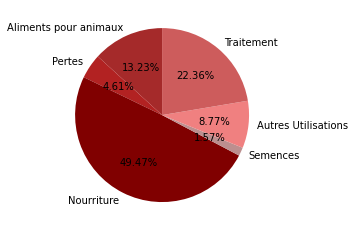

In [160]:
plt.pie(x=sizes, labels=labels, colors=colors, autopct='%1.2f%%', startangle=90)
plt.savefig('PieChart01.png')

*5. Use of domestic grain availability :*

    → Grain list : Blé, Riz (Eq Blanchi), Orge, Maïs, Seigle, Avoine, Millet, Sorgho, Céréales, Autres

In [117]:
foodAvailabilityGrain = foodAvailability.loc[foodAvailability["Produit"].isin(
    ["Blé", 
     "Riz (Eq Blanchi)", 
     "Orge", 
     "Maïs", 
     "Seigle", 
     "Avoine", 
     "Millet", 
     "Sorgho", 
     "Céréales, Autres"])].copy()

In [118]:
foodAvailabilityGrain

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
7,Afghanistan,Blé,vegetale,0.0,0.0,1369.0,160.23,4.69,36.91,5.992000e+09,0.0,1.173000e+09,4.895000e+09,775000000.0,5.169000e+09,322000000.0,0.0,-350000000.0
12,Afghanistan,"Céréales, Autres",vegetale,0.0,0.0,0.0,0.00,0.00,0.00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.0,0.0,0.0
32,Afghanistan,Maïs,vegetale,200000000.0,0.0,21.0,2.50,0.30,0.56,3.130000e+08,0.0,1.000000e+06,7.600000e+07,31000000.0,3.120000e+08,5000000.0,0.0,0.0
34,Afghanistan,Millet,vegetale,0.0,0.0,3.0,0.40,0.02,0.08,1.300000e+07,0.0,0.000000e+00,1.200000e+07,1000000.0,1.300000e+07,0.0,0.0,0.0
40,Afghanistan,Orge,vegetale,360000000.0,0.0,26.0,2.92,0.24,0.79,5.240000e+08,0.0,1.000000e+07,8.900000e+07,52000000.0,5.140000e+08,22000000.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15545,Îles Salomon,"Céréales, Autres",vegetale,0.0,0.0,0.0,0.00,0.00,0.00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.0,0.0,0.0
15568,Îles Salomon,Maïs,vegetale,0.0,0.0,1.0,0.15,0.01,0.03,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.0,0.0,0.0
15575,Îles Salomon,Orge,vegetale,0.0,0.0,0.0,0.07,0.00,0.01,1.000000e+06,0.0,1.000000e+06,0.000000e+00,0.0,0.000000e+00,0.0,1000000.0,0.0
15591,Îles Salomon,Riz (Eq Blanchi),vegetale,0.0,12000000.0,623.0,63.76,1.36,10.90,4.900000e+07,0.0,4.700000e+07,3.600000e+07,1000000.0,3.000000e+06,0.0,0.0,0.0


- "Aliments pour animaux" on Domestic Grain Availability (%) :

In [161]:
Calc_part_animaux2 = round((foodAvailabilityGrain["Aliments pour animaux"].sum() / foodAvailabilityGrain["Disponibilité intérieure"].sum()) * 100,2)

In [164]:
print("La part des aliments destinée aux animaux dans la disponilité intérieure mondiale des céréales en 2017 est de", Calc_part_animaux2, "%")

La part des aliments destinée aux animaux dans la disponilité intérieure mondiale des céréales en 2017 est de 36.29 %


- "Pertes" on Domestic Grain Availability (%) :

In [165]:
Calc_part_pertes2 = round((foodAvailabilityGrain["Pertes"].sum() / foodAvailabilityGrain["Disponibilité intérieure"].sum()) * 100,2)

In [122]:
print("La part des aliments perdue dans la disponilité intérieure mondiale des céréales en 2017 est de", round(Calc_part_pertes2, 2), "%")

La part des aliments perdue dans la disponilité intérieure mondiale des céréales en 2017 est de 4.45 %


- "Nourriture" on Domestic Grain Availability (%) :

In [166]:
Calc_part_nourriture2 = round((foodAvailabilityGrain["Nourriture"].sum() / foodAvailabilityGrain["Disponibilité intérieure"].sum()) * 100,2)

In [124]:
print("La part des aliments destinée à l'alimentation humaine dans la disponilité intérieure mondiale des céréales en 2017 est de", round(Calc_part_nourriture2, 2), "%")

La part des aliments destinée à l'alimentation humaine dans la disponilité intérieure mondiale des céréales en 2017 est de 42.75 %


- "Semences" on Domestic Grain Availability (%) :

In [167]:
Calc_part_semences2 = round((foodAvailabilityGrain["Semences"].sum() / foodAvailabilityGrain["Disponibilité intérieure"].sum()) * 100,2)

In [126]:
print("La part des aliments destinée aux semences agricoles dans la disponilité intérieure mondiale des céréales en 2017 est de", round(Calc_part_semences2, 2), "%")

La part des aliments destinée aux semences agricoles dans la disponilité intérieure mondiale des céréales en 2017 est de 2.85 %


- "Autres Utilisations" on Domestic Grain Availability (%) :

In [168]:
Calc_part_autres2 = round((foodAvailabilityGrain["Autres Utilisations"].sum() / foodAvailabilityGrain["Disponibilité intérieure"].sum()) * 100,2)

In [128]:
print("La part des aliments destinée aux autres usages dans la disponilité intérieure mondiale des céréales en 2017 est de", round(Calc_part_autres2, 2), "%")

La part des aliments destinée aux autres usages dans la disponilité intérieure mondiale des céréales en 2017 est de 9.75 %


- "Traitement" on Domestic Grain Availability (%) :

In [170]:
Calc_part_traitement2 = round((foodAvailabilityGrain["Traitement"].sum() / foodAvailabilityGrain["Disponibilité intérieure"].sum()) * 100,2)

In [130]:
print("La part des aliments destinée aux traitements industriels dans la disponilité intérieure mondiale des céréales en 2017 est de", round(Calc_part_traitement2, 2), "%")

La part des aliments destinée aux traitements industriels dans la disponilité intérieure mondiale des céréales en 2017 est de 3.93 %


- Domestic grain availability repartition (%) :

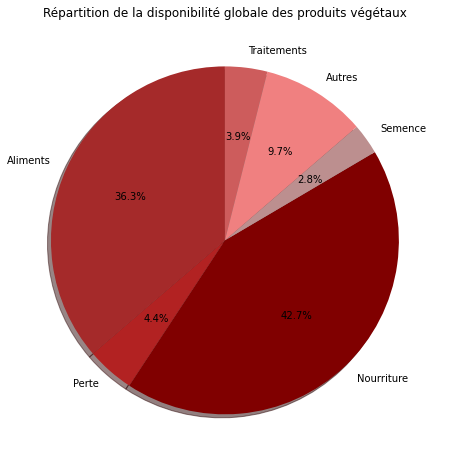

In [173]:
plt.figure(figsize=(12,8))
plt.title("Répartition de la disponibilité globale des produits végétaux")

labels = 'Aliments', 'Perte', 'Nourriture', 'Semence', 'Autres', 'Traitements'

colors = ['brown', 'firebrick', 'maroon', 'rosybrown','lightcoral','indianred']

DomesticGrainAvailability = [Calc_part_animaux2, 
                             Calc_part_pertes2, 
                             Calc_part_nourriture2, 
                             Calc_part_semences2, 
                             Calc_part_autres2, 
                             Calc_part_traitement2]

plt.pie(DomesticGrainAvailability, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90)
plt.savefig('PieChart02.png')

 *6. the example of Thailand in the use of cassava (manioc) :*

- Undernutrition proportion in Thailand :

In [134]:
undernutritionAndPop2017 = pop2017.merge(undernutrition2017, on="Zone", how="inner")

In [135]:
undernutritionAndPop2017_Thailand = undernutritionAndPop2017.loc[undernutritionAndPop2017["Zone"].isin(["Thaïlande"])].copy()

In [136]:
undernutritionAndPop2017_Thailand

,Zone,2017,Population (en milliers d'hab),Population (en million d'hab),Population totale,Année,Valeur (en million d'hab),Valeur (en milliers d'hab)
183,Thaïlande,2017,69209.81,69.20981,69209810.0,2017,6.2,6200


In [137]:
Proportion_Undernutrition_Thailand = (undernutritionAndPop2017_Thailand["Valeur (en milliers d'hab)"] / undernutritionAndPop2017_Thailand["Population (en milliers d'hab)"]) * 100

In [138]:
Proportion_Undernutrition_Thailand = Proportion_Undernutrition_Thailand.astype(int)

In [139]:
print("La proportion de la population thaïlandaise souffrant de malnutrition est de : ", round(Proportion_Undernutrition_Thailand.sum(),2), "%")

La proportion de la population thaïlandaise souffrant de malnutrition est de :  8 %


- use of cassava (manioc) in Thailand :

    → Disponibilité intérieure = Production + Importations - Exportations + Variation de stock

In [140]:
foodAvailability_Manioc = foodAvailability.loc[foodAvailability["Produit"].isin(["Manioc"])].copy()

In [141]:
foodAvailability_Manioc_Thailand = foodAvailability_Manioc.loc[foodAvailability_Manioc["Zone"].isin(["Thaïlande"])].copy()

In [142]:
foodAvailability_Manioc_Thailand

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
13809,Thaïlande,Manioc,vegetale,1.800000e+09,2.081000e+09,40.0,13.0,0.05,0.14,6.264000e+09,2.521400e+10,1.250000e+09,871000000.0,1.511000e+09,3.022800e+10,0.0,0.0,0.0


- "Exportations" on cassava availability (%) :

In [143]:
Calc_part_exportations = (foodAvailability_Manioc_Thailand["Exportations - Quantité"].sum() / foodAvailability_Manioc_Thailand["Production"].sum()) * 100

In [144]:
print("La part du manioc destinée à l'exportation sur la production totale du manioc en 2017 en Thaïlande est de", round(Calc_part_exportations, 2), "%")

La part du manioc destinée à l'exportation sur la production totale du manioc en 2017 en Thaïlande est de 83.41 %


- Manioc availability repartition in Thailand (%) :

In [145]:
labels = 'Exportations', 'Production'
colors = ['gold', 'lightskyblue']

In [146]:
sizes = [round(Calc_part_exportations, 2)]

ValueError: 'label' must be of length 'x'

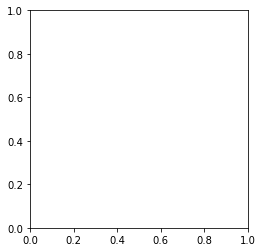

In [147]:
plt.pie = plt.pie(sizes, labels=labels, colors=colors, 
        autopct='%1.1f%%', shadow=True, startangle=90)

*7. List of countries for which the proportion of undernourished people is the highest in 2017 :*

In [174]:
undernutritionAndPop2017

,Zone,2017,Population (en milliers d'hab),Population (en million d'hab),Population totale,Année,Valeur (en million d'hab),Valeur (en milliers d'hab)
0,Afghanistan,2017,36296.113,36.296113,36296113.0,2017,10.5,10500
1,Afrique du Sud,2017,57009.756,57.009756,57009756.0,2017,3.1,3100
2,Albanie,2017,2884.169,2.884169,2884169.0,2017,0.1,100
3,Algérie,2017,41389.189,41.389189,41389189.0,2017,1.3,1300
4,Allemagne,2017,82658.409,82.658409,82658409.0,2017,0.0,0
...,...,...,...,...,...,...,...,...
196,Venezuela (République bolivarienne du),2017,29402.484,29.402484,29402484.0,2017,8.0,8000
197,Viet Nam,2017,94600.648,94.600648,94600648.0,2017,6.5,6500
198,Yémen,2017,27834.819,27.834819,27834819.0,2017,0.0,0
199,Zambie,2017,16853.599,16.853599,16853599.0,2017,0.0,0


In [175]:
undernutritionAndPop2017["Proportion malnutrition"] = round((undernutritionAndPop2017["Valeur (en milliers d'hab)"] / undernutritionAndPop2017["Population (en milliers d'hab)"]) * 100,2)

In [186]:
undernutritionAndPop2017[["Zone", "Proportion malnutrition"]].sort_values(by=["Proportion malnutrition"], ascending=False).head(10)

,Zone,Proportion malnutrition
78,Haïti,48.26
157,République populaire démocratique de Corée,47.19
108,Madagascar,41.06
103,Libéria,38.28
100,Lesotho,38.25
182,Tchad,37.96
160,Rwanda,35.06
121,Mozambique,32.81
184,Timor-Leste,32.17
0,Afghanistan,28.93


*8. Those who have provided the most aid since 2013 :*

*9. Those with the most availability/inhabitant :*

*9. Those with the least availability/inhabitant :*